# Random Forest Classifier


## import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

## import dataset

In [2]:
df = pd.read_csv('fish_data.csv')
print(df.head())

              species  length  weight  w_l_ratio
0  Anabas testudineus   10.66    3.45       0.32
1  Anabas testudineus    6.91    3.27       0.47
2  Anabas testudineus    8.38    3.46       0.41
3  Anabas testudineus    7.57    3.36       0.44
4  Anabas testudineus   10.83    3.38       0.31


## Preprocessing data


### Encoding label


In [3]:
label_encoder = LabelEncoder()
df['species'] = label_encoder.fit_transform(df['species'])
print(df.head())

   species  length  weight  w_l_ratio
0        0   10.66    3.45       0.32
1        0    6.91    3.27       0.47
2        0    8.38    3.46       0.41
3        0    7.57    3.36       0.44
4        0   10.83    3.38       0.31


### Split data


In [4]:
X = df[['length', 'weight', 'w_l_ratio']]
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Scaling feature


In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Training model


In [6]:
rfClassifier = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)
rfClassifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

## Evaluate model


In [7]:
y_pred = rfClassifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi: {accuracy * 100:.2f}%')

Akurasi: 93.26%


In [8]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       120
           1       1.00      1.00      1.00        77
           2       0.69      0.73      0.71        91
           3       1.00      1.00      1.00        86
           4       1.00      1.00      1.00        89
           5       1.00      1.00      1.00       102
           6       1.00      1.00      1.00        65
           7       0.74      0.70      0.72       100
           8       1.00      1.00      1.00        86

    accuracy                           0.93       816
   macro avg       0.94      0.94      0.94       816
weighted avg       0.93      0.93      0.93       816



## Visualitation


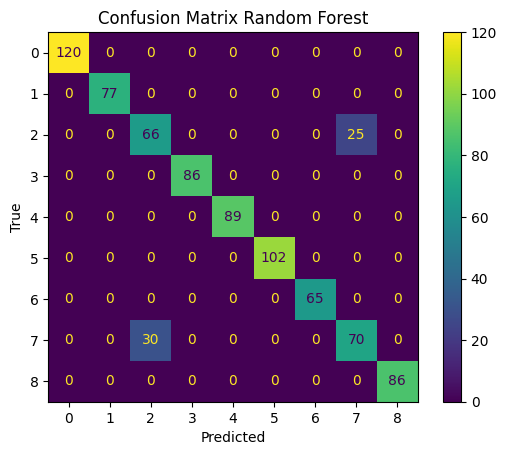

In [9]:
# Confusion matrix
ConfusionMatrixDisplay.from_estimator(rfClassifier, X_test, y_test)
plt.title('Confusion Matrix Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Confusion matrix menunjukkan bahwa model Random Forest memiliki performa yang baik pada beberapa kelas, namun kesulitan membedakan kelas 2 dan 7. Kelas 0 diprediksi dengan benar sebanyak 120 kali, sementara kesalahan prediksi tertinggi terjadi antara kelas 2 dan 7.

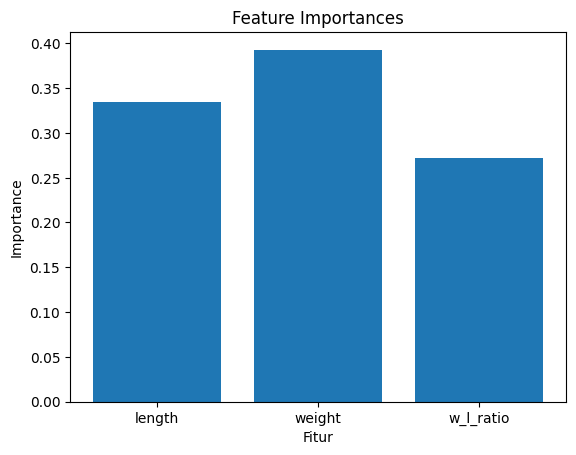

In [10]:
# Feature importance in Random Forest model
importances = rfClassifier.feature_importances_
features = ['length', 'weight', 'w_l_ratio']

plt.bar(features, importances)
plt.title('Feature Importances')
plt.xlabel('Fitur')
plt.ylabel('Importance')
plt.show()


Grafik menunjukkan bahwa `weight` memiliki pengaruh terbesar, diikuti oleh `length`, sementara `w_l_ratio` memiliki pengaruh terkecil dalam model. Dengan demikian, `weight` dan `length` lebih berperan dalam menentukan spesies ikan.

## Export model

In [12]:
import pickle

with open('../models/random_forest_model.pkl', 'wb') as model_file:
    pickle.dump(rfClassifier, model_file)

with open('../models/scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

with open('../models/label_encoder.pkl', 'wb') as le_file:
    pickle.dump(label_encoder, le_file)

print('Berhasil ekspor')

Berhasil ekspor
